Data Preprocessing

In [2]:
library(tidyverse)
library(tidymodels)
library(hms)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Reads the CSV, changes the format of the columns of `start_time` and `end_time` to POSIXct objects.

In [3]:
id <- "14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessions_df <- read.csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id))
sessions_df_start_time_end_time <- sessions_df|>
    mutate(start_time = with_tz(as_datetime(dmy_hm(start_time )), tz = "America/Vancouver"))|>
    mutate(end_time = with_tz(as_datetime(dmy_hm(end_time)), tz = "America/Vancouver"))|>
    select(start_time, end_time)|>
    arrange(start_time)|>
    drop_na()

Creates a list `tinterval` containing every time interval between the start time of the first play session `start.min` and the end time of the latest play session `end.max`

In [4]:
start.min <- min(sessions_df_start_time_end_time$start_time, na.rm=T)
end.max <- max(sessions_df_start_time_end_time$end_time, na.rm=T)
tinterval <- seq.POSIXt(start.min, end.max, by = "mins")

Creates a new dataframe `session_df_by_minute` containing the number of players online between `start.min` and `end.max`. (I'm not sure what happens here but it works?)

In [5]:
player_count <- sapply(tinterval, function(tt) sum(sessions_df_start_time_end_time$start_time <= tt & tt <= sessions_df_start_time_end_time$end_time))

In [11]:
max_daily_user <- data.frame(tinterval, player_count)|>
        mutate(ymd = as.Date(tinterval))|>
        group_by(ymd)|>
        summarize(max_concurrent_players = max(player_count))|>
        mutate(wday = wday(ymd))|>
        mutate(mday = mday(ymd))
max_daily_user

ymd,max_concurrent_players,wday,mday
<date>,<int>,<dbl>,<int>
2024-04-06,1,7,6
2024-04-07,2,1,7
2024-04-08,1,2,8
2024-04-09,1,3,9
2024-04-10,0,4,10
2024-04-11,0,5,11
2024-04-12,0,6,12
2024-04-13,0,7,13
2024-04-14,1,1,14


KNN Regression initialization

In [45]:
set.seed(69420)
# splitting the data into training and testing sets
sessions_split <- initial_split(max_daily_user , prop = 0.6 , strata = max_concurrent_players)
sessions_training <- training(sessions_split)
sessions_testing <- testing(sessions_split)
# knn regression, tune nearest neighbors
sessions_spec <- nearest_neighbor(weight_func = "rectangular" , neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression")
# predict based on as_minutes and wday
sessions_recipe <- recipe( max_concurrent_players ~ wday, data = sessions_training) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())
# workflow
sessions_workflow <- workflow() |>
      add_recipe(sessions_recipe) |>
      add_model(sessions_spec)



In [46]:
# five fold validation
sessions_vfold <- vfold_cv(sessions_training, v = 5, strata = max_concurrent_players)
# tibble of neighbor values between 1 and 200
gridvals <- tibble(neighbors = seq(1,70, by=1))
# training
training_results <- sessions_workflow |>
                       tune_grid(resamples = sessions_vfold, grid = gridvals) |>
                       collect_metrics() 
# best neightbor values
training_min <- training_results |>
               filter(.metric == 'rmse') |>
               filter(mean == min(mean)) |>
            select( neighbors)|>
            pull()

In [47]:
# engine spec for the best 
session_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = training_min) |>
                  set_engine("kknn") |>
                  set_mode("regression")
# fit model to training data
session_fit <- workflow() |>
           add_recipe(sessions_recipe) |>
           add_model(session_best_spec) |>
           fit(data = sessions_training)

In [48]:
# predict testing data 
session_summary <- session_fit |> 
           predict(sessions_testing) |>
           bind_cols(sessions_testing) |>
           metrics(truth = max_concurrent_players, estimate = .pred) 

Results

In [49]:
session_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.29786238
rsq,standard,0.07123957
mae,standard,0.99077222


In [50]:
# create dataframe with predicted and actual results
compare_df <- session_fit |> 
           predict(sessions_testing) |>
           bind_cols(sessions_testing)
compare_df

.pred,ymd,max_concurrent_players,wday,mday
<dbl>,<date>,<int>,<dbl>,<int>
2.137931,2024-04-09,1,3,9
2.241379,2024-04-10,0,4,10
2.620690,2024-04-14,1,1,14
2.275862,2024-04-15,2,2,15
2.206897,2024-04-18,2,5,18
2.137931,2024-04-23,1,3,23
2.206897,2024-04-25,2,5,25
2.310345,2024-04-26,2,6,26
2.620690,2024-04-28,3,1,28


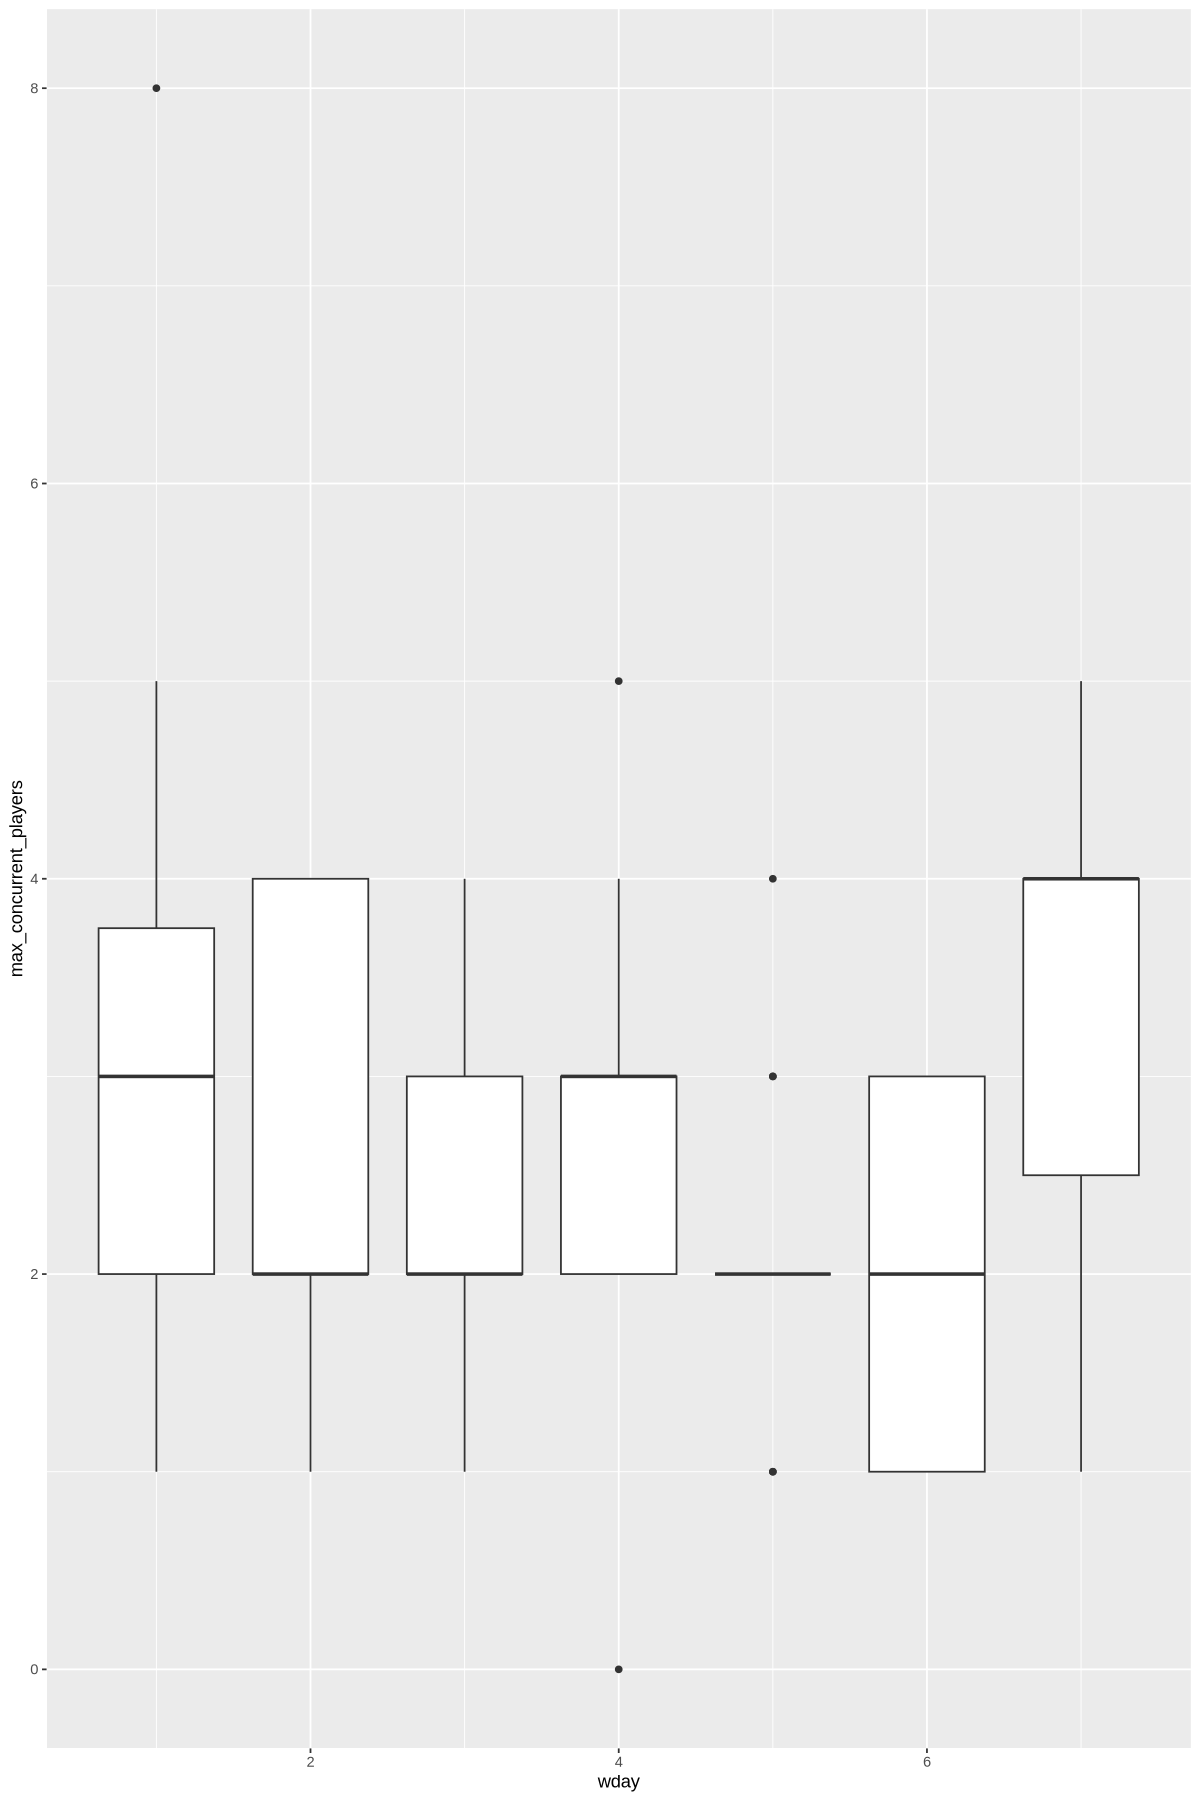

In [61]:
# plot
compare_plot <- compare_df |>
    ggplot( aes( wday, max_concurrent_players))+
    geom_boxplot(aes(group = cut_width(wday, 1)))
    #geom_line( aes( x = wday, y = .pred))
options(repr.plot.width = 10, repr.plot.height = 15)
compare_plot